In [1]:
from numpy import cumsum, random

from Objects import TF_object
from scipy.signal import TransferFunction
from numpy_utils import converters
from Controllers import PID_controller
import Plotters as sim_plt

### Define an object with one proper input (tf11) and two disturbances (tf12, tf13)

In [2]:
tf11 = TransferFunction([5, 3], [3.5, 1.7, 1])
tf12 = TransferFunction([1], [2.5, 1])
tf13 = TransferFunction([5, 1], [3.5, 1])

tf = [
    [tf11, tf12, tf13]
]
tf_mat = converters.to_array_converter().convert_any_type(tf, vec_type='horizontal')

obj = TF_object(tf_matrix=tf_mat, sampling_time=0.1)

### Preview of step responses to each entry

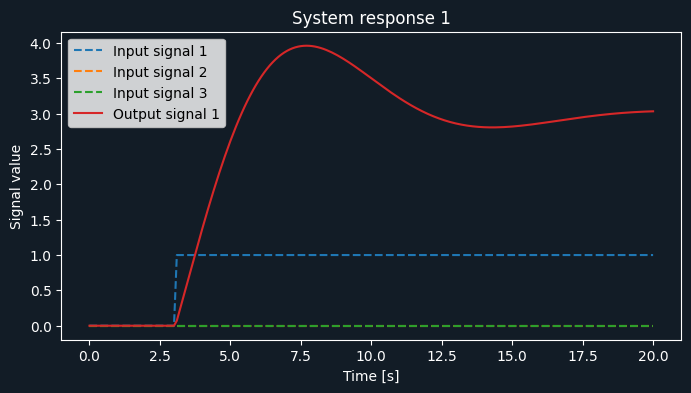

In [3]:
obj.reset_history()
for i in range(0, 200):
    u1 = 0 if i < 30 else 1
    d1 = 0
    d2 = 0

    u = converters.to_vector_converter().convert_any_type([u1, d1, d2])
    obj.simulate_step(u)
sim_plt.plot_object_history(obj, figsize=(8, 4))

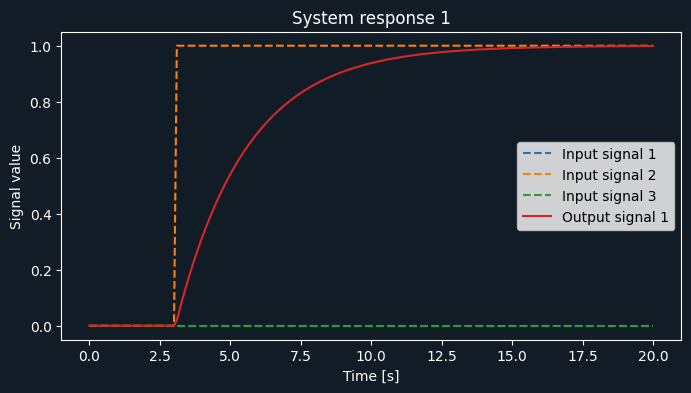

In [4]:
obj.reset_history()
for i in range(0, 200):
    u1 = 0 
    d1 = 0 if i < 30 else 1
    d2 = 0

    u = converters.to_vector_converter().convert_any_type([u1, d1, d2])
    obj.simulate_step(u)
sim_plt.plot_object_history(obj, figsize=(8, 4))

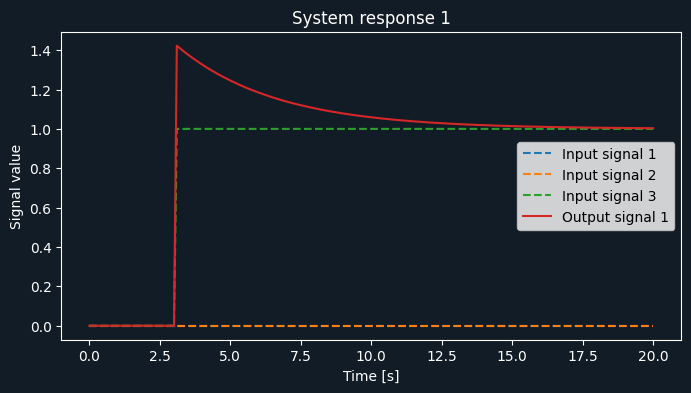

In [5]:
obj.reset_history()
for i in range(0, 200):
    u1 = 0 
    d1 = 0 
    d2 = 0 if i < 30 else 1

    u = converters.to_vector_converter().convert_any_type([u1, d1, d2])
    obj.simulate_step(u)
sim_plt.plot_object_history(obj, figsize=(8, 4))

### PID control - disturbances compensation

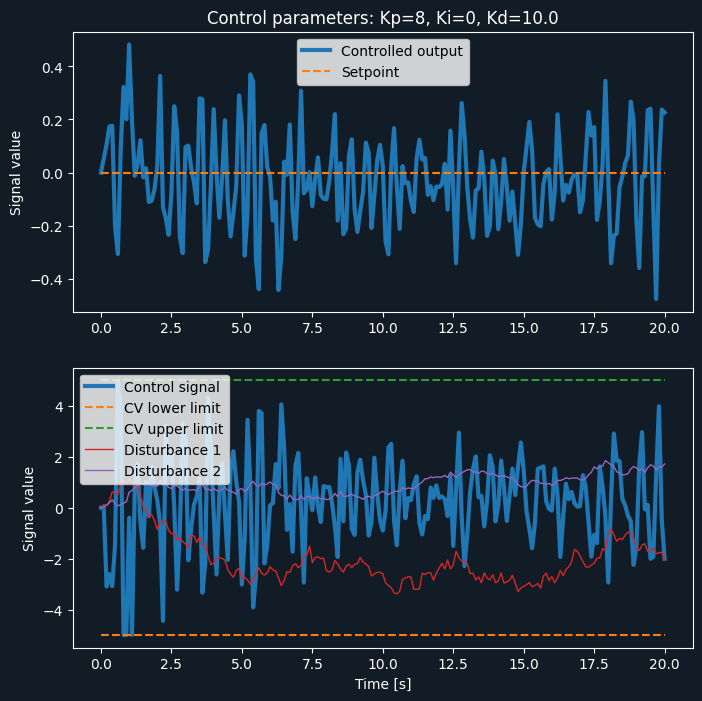

In [8]:
obj.reset_history()

Kp = 8
Ki = 0
Kd = 1e1
pid = PID_controller(Kp, Ki, Kd, setpoint=0, sample_time=0.1)
pid.set_CV_limit(-5, 5)

random.seed(42)
dist1 = random.normal(0, 0.25, 200)
dist1 = cumsum(dist1)

dist2 = random.normal(0, 0.1, 200)
dist2 = cumsum(dist2)

for t in range(0, 200):
    d1 = dist1[t]
    d2 = dist2[t]

    pv = obj.get_output_hist()[-1][0][0]
    cv = pid.simulate_step(pv)
    u = converters.to_vector_converter().convert_any_type([cv, d1, d2])

    obj.simulate_step(u)

cm = {
    0 : [0, pid]
}
sim_plt.plot_regulation_history(obj, cm, figsize=(8, 8))

### PID control - change of the setpoint + disturbance compensation 

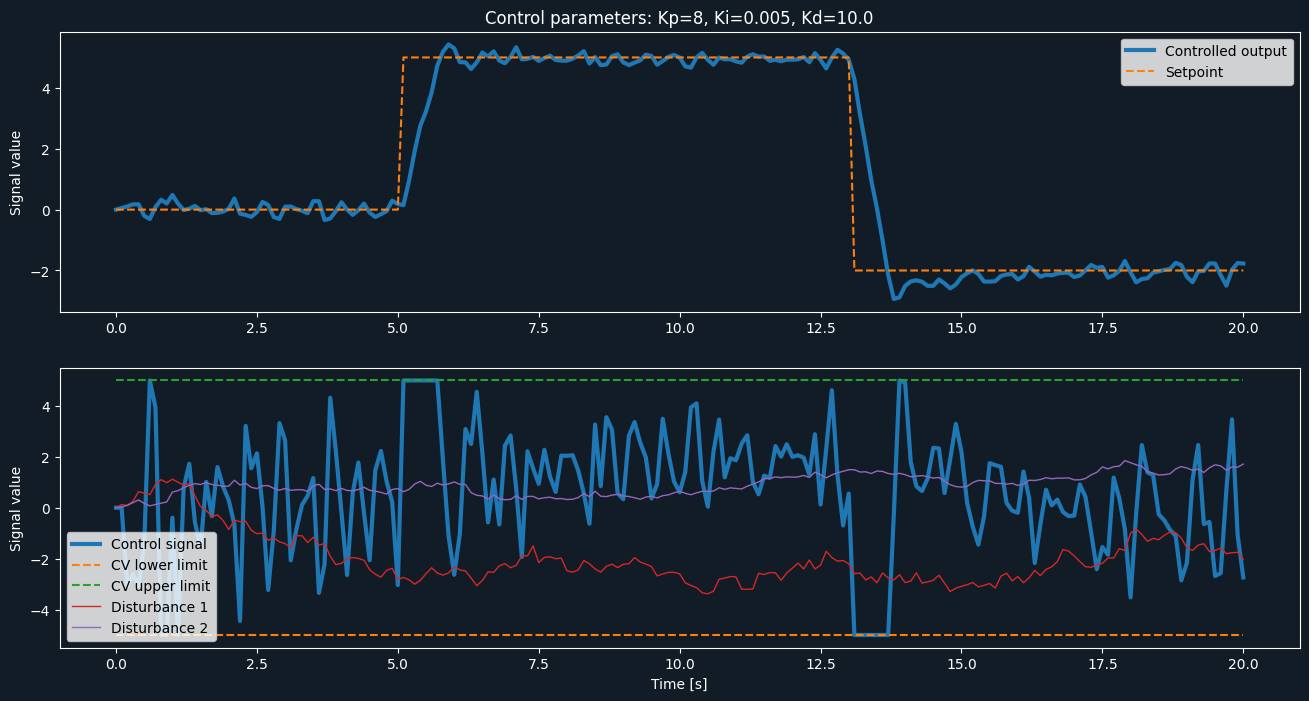

In [9]:
obj.reset_history()

Kp = 8
Ki = 5e-3
Kd = 1e1
pid = PID_controller(Kp, Ki, Kd, setpoint=0, sample_time=0.1)
pid.set_CV_limit(-5, 5)

random.seed(42)
dist1 = random.normal(0, 0.25, 200)
dist1 = cumsum(dist1)

dist2 = random.normal(0, 0.1, 200)
dist2 = cumsum(dist2)

for t in range(0, 200):
    if t == 50:
        pid.set_setpoint(5) 
    elif t== 130:
        pid.set_setpoint(-2)
    
    d1 = dist1[t]
    d2 = dist2[t]

    pv = obj.get_output_hist()[-1][0][0]
    cv = pid.simulate_step(pv)
    u = converters.to_vector_converter().convert_any_type([cv, d1, d2])

    obj.simulate_step(u)

cm = {
    0 : [0, pid]
}
sim_plt.plot_regulation_history(obj, cm, figsize=(16, 8))